In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

In [18]:
data = pd.read_csv("dataset.csv", low_memory=False, index_col="Num_Acc")

In [19]:
data = data.drop(["Unnamed: 0"], axis=1)
data

,ageCateg18_1,ageCateg65_1,grav_1,locp_1,count_veh,diff_cat_1,an_1,hrmn_1,hrmn_2,lum_1,agg_2,int_1,atm_1,col_1,col_2,sun_sat_hol_holminus1_1,friday_1,catr_1,catr_2,circ_1,vosp_1,prof_1,plan_1,larrout_1,surf_1,surf_2,situ_1
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,
200500000001,0,0,1,0,2,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
200500000002,0,0,1,0,2,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
200500000003,0,0,1,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
200500000004,0,1,1,0,3,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
200500000005,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1
200500000006,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1
200500000007,0,0,0,0,2,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
200500000008,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1
200500000009,0,1,1,0,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0


In [23]:
data['ageCateg65_1'].value_counts()

0    717321
1    122600
Name: ageCateg65_1, dtype: int64

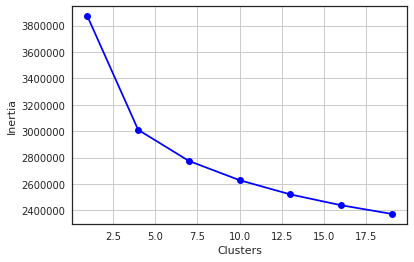

In [4]:
from sklearn.cluster import KMeans

# Range de valores de clusters que vamos testar
k = range(1,20,3)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i, n_jobs=-1)

    # Treine o modelo
    model = kmeans.fit(data)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [12]:
kmeans = KMeans(n_clusters=8, n_jobs=-1)
labels = kmeans.fit_predict(data)

In [13]:
label, count = np.unique(labels, return_counts=True)
for l, c in zip(label,count):
    print('Cluster {}: {}'.format(l,c))

Cluster 0: 112254
Cluster 1: 80451
Cluster 2: 113375
Cluster 3: 155529
Cluster 4: 144838
Cluster 5: 75985
Cluster 6: 53441
Cluster 7: 104048


In [14]:
clusters_n = kmeans.labels_.astype(np.int)

In [15]:
clusters_n

array([7, 2, 4, ..., 2, 3, 3])

In [16]:
data["cluster"] = clusters_n
data.groupby("cluster").mean()

,ageCateg18_1,ageCateg65_1,grav_1,locp_1,count_veh,diff_cat_1,an_1,hrmn_1,hrmn_2,lum_1,agg_2,int_1,atm_1,col_1,col_2,sun_sat_hol_holminus1_1,friday_1,catr_1,catr_2,circ_1,vosp_1,prof_1,plan_1,larrout_1,surf_1,surf_2,situ_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.060051,0.165428,0.376762,0.802074,1.005924,0.000392,0.374615,0.208723,0.018645,1.000000,0.978059,0.744241,0.859934,0.983422,0.016543,0.199129,0.822269,0.772543,0.041789,0.614499,0.919130,0.164921,0.136895,0.110776,0.116138,0.035429,0.107016
1,0.063728,0.077600,0.516339,0.064014,1.003045,0.000112,0.333806,0.188276,0.157052,0.604766,0.489764,0.875937,0.763744,0.000000,0.999988,0.379026,0.850045,0.381238,0.033138,0.605623,0.959889,0.327342,0.407279,0.133348,0.243341,0.072976,0.309455
2,0.123960,0.135912,0.204569,0.007938,2.087241,0.744273,0.329693,0.228578,0.023885,1.000000,0.977006,1.000000,0.965486,0.115475,0.012384,0.211581,0.823215,0.799127,0.023321,0.678536,0.916701,0.190756,0.167991,0.142721,0.023197,0.041482,0.058858
3,0.081245,0.158273,0.261527,0.005954,2.286075,0.673019,0.367848,0.232214,0.050351,0.901915,0.677141,0.329013,0.939246,0.069286,0.009574,0.233989,0.827659,0.502350,0.017026,0.454816,0.935684,0.172000,0.155141,0.280674,0.053386,0.034630,0.073208
4,0.094430,0.112208,0.341050,0.006276,2.075754,0.635959,0.347858,0.267022,0.294646,0.264316,0.820185,0.555697,0.518704,0.081864,0.009894,0.296780,0.828091,0.605987,0.019132,0.653323,0.932877,0.215793,0.196116,0.162147,0.483941,0.025221,0.061627
5,0.044180,0.120195,0.741423,0.057709,1.014477,0.001040,0.366151,0.158413,0.161019,0.543068,0.214582,0.952188,0.745476,0.999210,0.000000,0.464565,0.865052,0.080200,0.048918,0.633625,0.972903,0.401434,0.495216,0.128354,0.254366,0.058985,0.521221
6,0.052245,0.113396,0.420052,0.589416,1.016504,0.000748,0.387979,0.347561,0.281544,0.002114,0.970846,0.747460,0.706237,0.987519,0.012200,0.314141,0.829775,0.757695,0.028779,0.641025,0.921839,0.187440,0.174435,0.124399,0.297917,0.036508,0.134260
7,0.111679,0.252931,0.887763,0.006411,2.070362,0.652295,0.347119,0.283158,0.072572,0.793884,0.229327,0.848310,0.937452,0.022288,0.003806,0.334077,0.833846,0.043711,0.024633,0.876326,0.965304,0.376048,0.310578,0.052168,0.035003,0.039117,0.059867


In [52]:
new_vehicles.head()

,count_veh,diff_cat_0,diff_cat_1,cluster
Num_Acc,,,,
200500000001,2,1,0,3
200500000002,2,0,1,0
200500000003,2,1,0,3
200500000004,3,1,0,2
200500000005,1,1,0,1


In [54]:
cluster_vehicles["cluster_vehicles"] = clusters_n
cluster_vehicles.head()

,count_veh,diff_cat_1,cluster_carac,cluster_vehicles
Num_Acc,,,,
200500000001,2,0,3,3
200500000002,2,1,0,0
200500000003,2,0,3,3
200500000004,3,0,2,2
200500000005,1,0,1,1


In [55]:
cluster_vehicles.to_csv("vehicles_with_clusters.csv", sep=',')